In [ ]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# parameters
num_classes = 10
h_c1 = 200
h_c2 = 50
lr_rate = 1e-3
batch_size = 100

In [14]:
# input placeholders
# image is flattened to 1-D vector
inputs = tf.placeholder(tf.float32, [None, X_train.shape[1]*X_train.shape[2]])
labels = tf.placeholder(tf.float32, [None,num_classes])

In [15]:
#build model
#layer 1 hidden unit count h_c 


# layer 1 weights
W1 = tf.Variable(tf.truncated_normal([X_train.shape[1]*X_train.shape[2], h_c1], stddev=0.01))
b1 = tf.Variable(tf.zeros(h_c1))
#layer 1 activation
h1 = tf.matmul(inputs, W1) + b1
# layer 1 output
o1 = tf.nn.relu(h1)

# layer 2 weights
W2 = tf.Variable(tf.truncated_normal([h_c1, h_c2], stddev=0.01))
b2 = tf.Variable(tf.zeros(h_c2))
#layer 2 activation
h2 = tf.matmul(o1, W2) + b2
# layer 2 output
o2 = tf.nn.relu(h2)


# final layer weights and biases
W3 = tf.Variable(tf.truncated_normal([h_c2, num_classes], stddev=0.01))
b3 = tf.Variable(tf.zeros(num_classes))
# final layer activation
logits = tf.matmul(o2, W3) + b3
predictions = tf.nn.softmax(logits)

In [16]:
# loss and optimizer
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))
optimizer = tf.train.AdamOptimizer(learning_rate=lr_rate).minimize(loss)
accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1)), tf.float32))

In [20]:
#training
epochs = 7
training_loss = []
validation_loss = []

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    iteration = 0
    
    for epoch in range(epochs):
        for idx in range(0, X_train.shape[0], batch_size):
            X = X_train[idx:idx+batch_size]
            X = np.reshape(X, [X.shape[0], -1])
            y = y_train[idx:idx+batch_size]
            y = np.eye(num_classes)[y] #one hot encode
            #y = tf.one_hot(y, depth=num_classes)
            
            feed = {inputs: X, labels: y}
            t_loss, _ = sess.run([loss, optimizer], feed_dict=feed)
            
            if iteration > 400 and iteration % 100 == 0:
                #training loss on full batch
                train_loss = []
                for idx2 in range(0, X_train.shape[0], batch_size):
                    X = X_train[idx2: idx2+batch_size]
                    X = np.reshape(X, [X.shape[0], -1])
                    y = y_train[idx2:idx2+batch_size]
                    y = np.eye(num_classes)[y] #one hot encode
                    #y = y_train[idx2: idx2+batch_size]
                    train_loss.append(sess.run([loss], feed_dict = {inputs:X, labels:y}))
                
                train_loss_mean = np.mean(train_loss)
                training_loss.append(train_loss_mean)
                
                #validation_loss
                val_loss = []
                val_accuracy = []
                for idx2 in range(0, X_val.shape[0], batch_size):
                    X = X_val[idx2: idx2+batch_size]
                    X = np.reshape(X, [X.shape[0], -1])
                    y = y_val[idx2:idx2+batch_size]
                    y = np.eye(num_classes)[y] #one hot encode
                    #y = y_test[idx2: idx2+batch_size]
                    v_loss, v_acc = sess.run([loss, accuracy], feed_dict = {inputs:X, labels:y})
                    val_loss.append(v_loss)
                    val_accuracy.append(v_acc)
                
                val_loss_mean = np.mean(val_loss)
                val_accuracy_mean = np.mean(val_accuracy)
                validation_loss.append(val_loss_mean)
                
                print("After iteration {}, Training Loss={:.3f} and Val loss={:.3f}. Val Accuracy={:5.2f}".format(
                    iteration, train_loss_mean, val_loss_mean, val_accuracy_mean))
            
            iteration += 1

    #final test_loss and test accuracy
    test_loss = []
    test_accuracy = []
    for idx2 in range(0, X_test.shape[0], batch_size):
        X = X_test[idx2: idx2+batch_size]
        X = np.reshape(X, [X.shape[0], -1])
        y = y_test[idx2:idx2+batch_size]
        y = np.eye(num_classes)[y] #one hot encode
        #y = y_test[idx2: idx2+batch_size]
        t_loss, t_acc = sess.run([loss, accuracy], feed_dict = {inputs:X, labels:y})
        test_loss.append(t_loss)
        test_accuracy.append(t_acc)

    test_loss_mean = np.mean(test_loss)
    test_accuracy_mean = np.mean(test_accuracy)

    print('\n')
    print('Test Set metrics after traianing')
    print("Test loss={:.3f}. Test Accuracy={:5.2f}".format(test_loss_mean, test_accuracy_mean))
            
            

After iteration 500, Training Loss=32.633 and Val loss=30.168. Val Accuracy=91.53
After iteration 600, Training Loss=29.746 and Val loss=27.989. Val Accuracy=91.75
After iteration 700, Training Loss=28.097 and Val loss=26.356. Val Accuracy=92.47
After iteration 800, Training Loss=25.295 and Val loss=23.686. Val Accuracy=93.10
After iteration 900, Training Loss=25.008 and Val loss=24.156. Val Accuracy=93.04
After iteration 1000, Training Loss=21.298 and Val loss=20.487. Val Accuracy=94.26
After iteration 1100, Training Loss=19.743 and Val loss=19.649. Val Accuracy=94.36
After iteration 1200, Training Loss=18.380 and Val loss=18.377. Val Accuracy=94.77
After iteration 1300, Training Loss=17.249 and Val loss=17.052. Val Accuracy=95.12
After iteration 1400, Training Loss=18.016 and Val loss=18.564. Val Accuracy=94.75
After iteration 1500, Training Loss=15.426 and Val loss=15.959. Val Accuracy=95.49
After iteration 1600, Training Loss=14.354 and Val loss=15.548. Val Accuracy=95.51
After ite

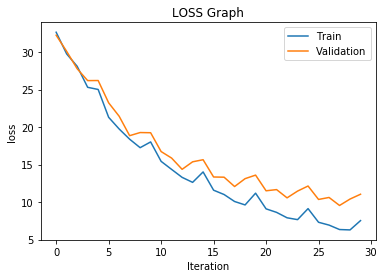

In [21]:
#plot the training and testing loss
x = [i for i in range(len(training_loss))]
plt.plot(x, training_loss, label='Train')
plt.plot(x, testing_loss, label='Validation')

plt.xlabel('Iteration')
plt.ylabel('loss')

plt.title("LOSS Graph")

plt.legend()

plt.show()